# Part A
https://www.statsmodels.org/stable/tsa.html

Things to take note:

Explanation of univariate vs multivariate time series forecasting

EDA (remember to analyse)
- Check whether it is stationary? (Augmented Dickey-Fuller (A) Test) What do we do next?
- Check for Trend and analyse (upward/downward, linear/non-linear)
- Check for Seasonality? What do we do next?
- Check for noise and random variations
- check for outlier
- Test for causality (Granger’s causality test)
    - Conceptually, Granger causality provides a much more stringent criterion for causation (or information flow) than simply observing high correlation with some lag-lead relationship (Damos, 2016)
- Is the target variable autocorrelated? ACF & PACF Test

- Decomposition
    - Secular trend, which describe the movement along the term;
    - Seasonal variations, which represent seasonal changes;
    - Cyclical fluctuations, which correspond to periodical but not seasonal variations;
    - Irregular variations, which are other nonrandom sources of variations of series.

Types of models (research on how to evaluate these models)
Univariate
- Autoregression (AR)
- Moving Average (MA)
- Autoregressive Moving Average (ARMA)
- Autoregressive Integrated Moving Average (ARIMA) # might be the best model
- Seasonal Autoregressive Integrated Moving-Average (SARIMA)


Multivariate
- Vector Autoregressions (VAR) note (Forecast Error Variance Decomposition (FEVD))
- Vector Moving Average (VMA)
- Vector Auto-Regressive Integrated Moving Average (VARIMA)
- Vector Error Correction Model (VECM)
- - Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX)
- Vector Autoregressive Moving-Average processes with eXogenous regressors (VARMAX)
https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/#:~:text=A%20Multivariate%20time%20series%20has,used%20for%20forecasting%20future%20values.


Smoothing
    - Exponential Smoothing
    - Double Exponential Smoothing
    - Triple Exponential Smoothing


Modelling and Data
- Split train data into train and eval
    - backtesting
    - Rolling window analysis
- Additive vs Multiplicative

Evaluation metrics
- RMSE
- Rolling window analysis
- Test for residuals
    - The “residuals” in a time series model are what is left over after fitting a model. For many (but not all) time series models, the residuals are equal to the difference between the observations and the corresponding fitted values:
        Residuals are useful in checking whether a model has adequately captured the information in the data. A good forecasting method will yield residuals with the following properties:

        The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.
        The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.
    - ACF & PACF Plot of residuals (Portmanteau tests for autocorrelation?)

- Akaike information criterion (AIC)
- Bayesian information criterion (BIC)

look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)
look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)
look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)
try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values
try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values

Citations
- Damos, P. (2016). Using multivariate cross correlations, Granger causality and graphical models to quantify spatiotemporal synchronization and causality between pest populations. BMC Ecology, 16(1). doi:10.1186/s12898-016-0087-7.
[Accessed 4 Jul. 2022]
- Jie, T. (2021). Time Series Analysis with Statsmodels. [online] Medium. Available at: https://towardsdatascience.com/time-series-analysis-with-statsmodels-12309890539a
[Accessed 4 Jul. 2022]
- US EPA,OAR (2016). Nitrogen Dioxide (NO2) Pollution | US EPA. [online] US EPA. Available at: https://www.epa.gov/no2-pollution
[Accessed 21 Jul. 2022].
- Duan, Y., Liu, X., Li, H., Yan, S., Yan, M., Mang, Y. and Yin, P. (2019). Season and temperature modify the short-term effect of nitrogen dioxide on cardiovascular mortality: a time-series study. The Lancet, [online] 394, p.S57. doi:10.1016/s0140-6736(19)32393-1.
[Accessed 21 Jul. 2022].

# dont forget model interpretation
https://gilberttanner.com/blog/introduction-to-machine-learning-model-interpretation/
https://towardsdatascience.com/explainable-artificial-intelligence-part-3-hands-on-machine-learning-model-interpretation-e8ebe5afc608
https://documentation.sas.com/doc/en/vdmmlcdc/8.4/vdmmladvug/n0dqb7uyhlqogvn16xnengpro0fc.htm
https://interpretation.ai/
https://towardsdatascience.com/interpretable-machine-learning-models-aef0c7be3fd9
ELI5

## Data Cleaning & EDA

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

sns.set(font_scale=2)
# train
df = pd.read_csv('../data/train.csv',parse_dates=True,na_values=-200)
dfs = pd.read_csv('../data/train.csv',parse_dates=True)

df  = df.iloc[: , :-2]

print('Missing Values')
print(df.isnull().sum())
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Date'] = [time.date() for time in df['Date']]

gas_co = df.loc[df['Gas'] == 'CO']
gas_HC = df.loc[df['Gas'] == 'HC']
gas_NO2 = df.loc[df['Gas'] == 'NO2']
gas_O3 = df.loc[df['Gas'] == 'O3']

display(df)

# test
df_test = pd.read_csv('../data/test.csv',parse_dates=True)

df_test  = df_test.iloc[: , :-2]
df_test = df_test.drop(columns=['id'])

print('Missing Values')
print(df_test.isnull().sum())
df_test['Date'] = pd.to_datetime(df_test['Date'],dayfirst=True)
df_test['Date'] = [time.date() for time in df_test['Date']]

display(df_test)

Missing Values
Date      0
T        24
RH       24
Gas       0
Value     0
dtype: int64


,Date,T,RH,Gas,Value
0,2016-03-15,12.020833,54.883334,CO,1053.200000
1,2016-03-16,9.833333,64.069791,CO,995.250000
2,2016-03-17,11.292708,51.107292,CO,1025.250000
3,2016-03-18,12.866319,51.530903,CO,1064.444444
4,2016-03-19,16.016667,48.843750,CO,1088.741667
...,...,...,...,...,...
1307,2017-02-01,5.267708,39.614930,O3,553.180556
1308,2017-02-02,-55.515972,-24.010417,O3,343.500000
1309,2017-02-03,-14.272917,28.563542,O3,334.458333
1310,2017-02-04,4.848611,37.832986,O3,379.513889


Missing Values
Date    0
T       0
RH      0
Gas     0
dtype: int64


,Date,T,RH,Gas
0,2017-02-06,6.616667,51.734375,CO
1,2017-02-07,7.613194,43.930903,CO
2,2017-02-08,7.252083,50.966667,CO
3,2017-02-09,7.473611,50.166319,CO
4,2017-02-10,5.571875,46.604167,CO
...,...,...,...,...
247,2017-04-05,17.554167,50.092708,O3
248,2017-04-06,15.919792,35.959722,O3
249,2017-04-07,15.489583,32.213542,O3
250,2017-04-08,18.381250,33.686458,O3


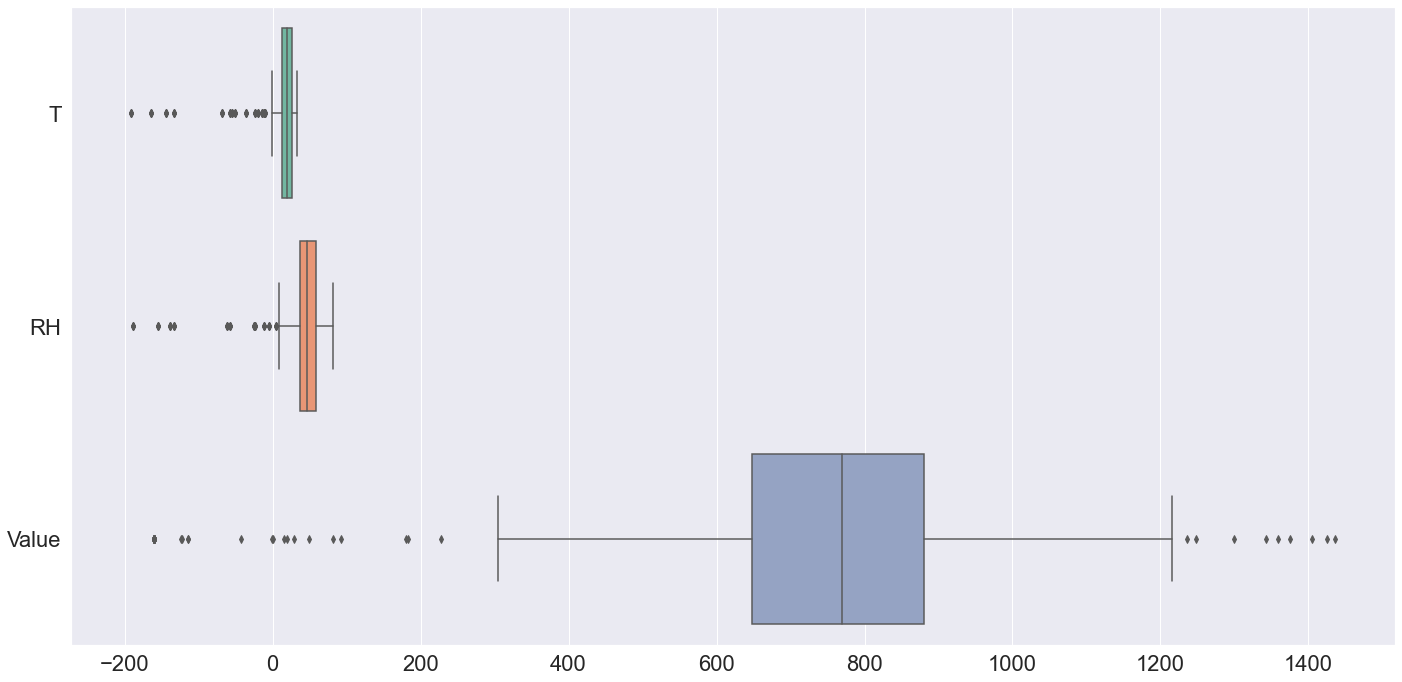

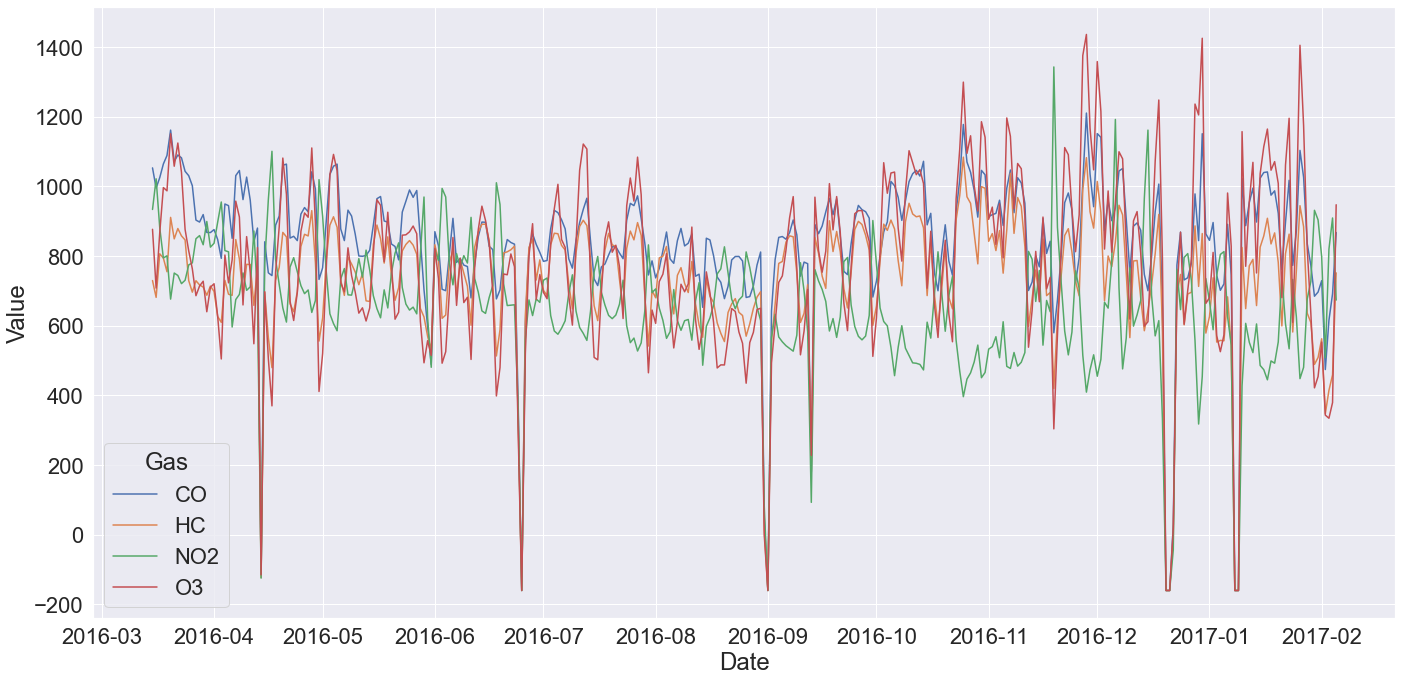

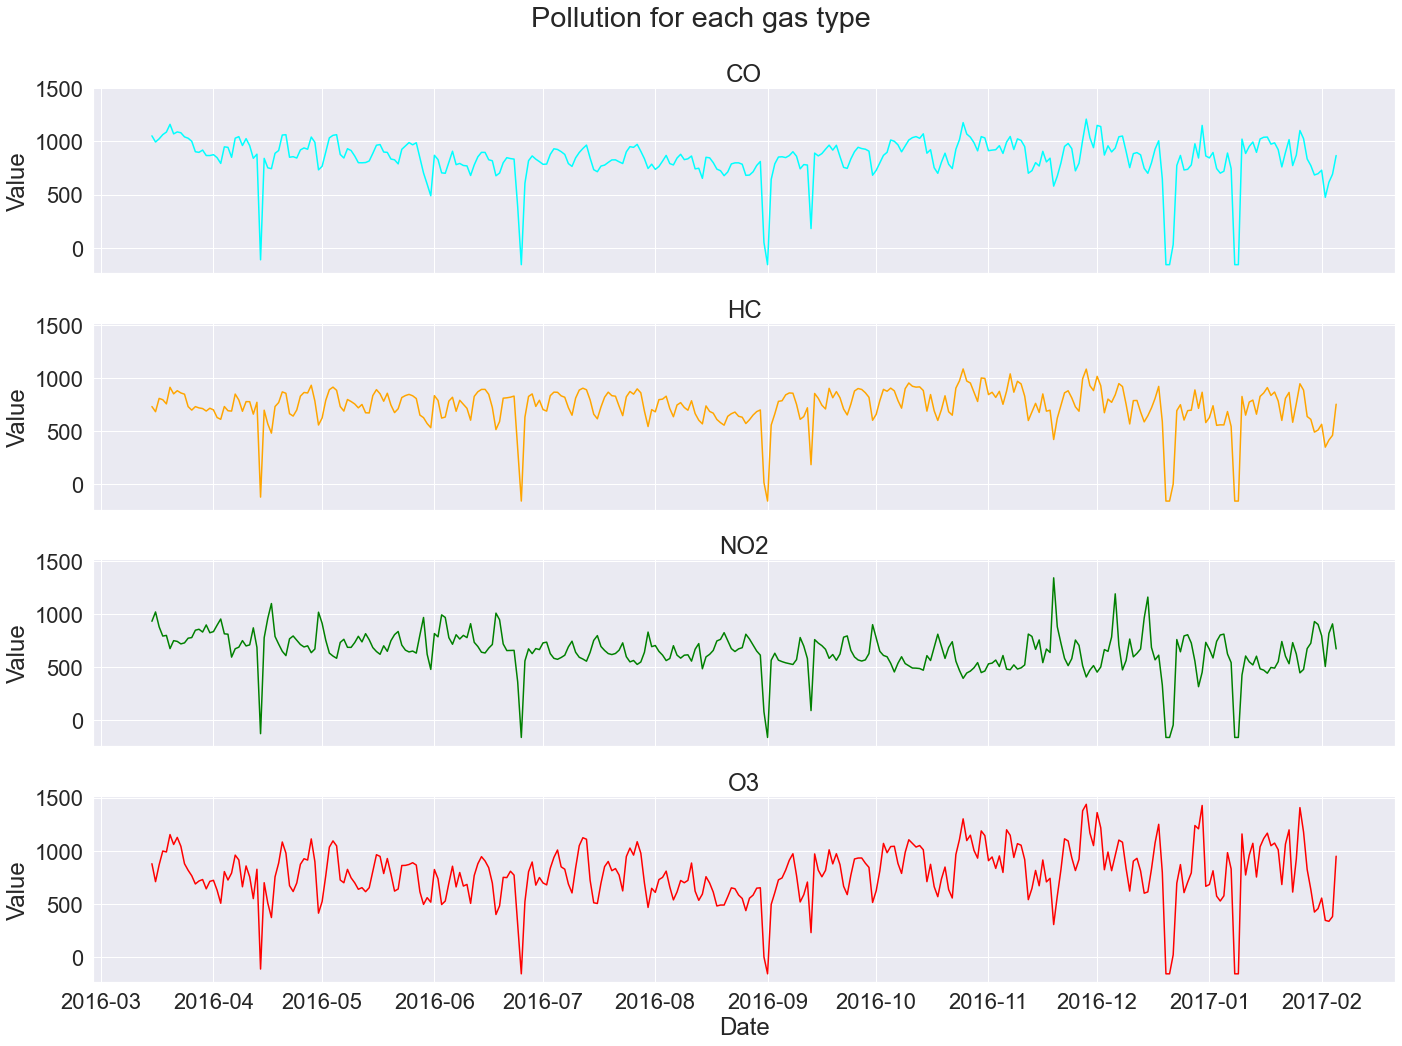

In [171]:

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

ax = sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()

ax = sns.lineplot(data=df, x="Date", y="Value", hue="Gas")
# ax.xaxis.set_visible(False)

fig, axes = plt.subplots(4, 1, figsize=(20, 15), sharey=True,sharex=True)
fig.suptitle('Pollution for each gas type')


# CO
sns.lineplot(ax=axes[0],data=gas_co, x="Date", y="Value",color='aqua')
axes[0].set_title('CO')
# axes[0].xaxis.set_visible(False)

# HC
sns.lineplot(ax=axes[1],data=gas_HC, x="Date", y="Value",color='orange')
axes[1].set_title('HC')
# axes[1].xaxis.set_visible(False)

# NO2
sns.lineplot(ax=axes[2],data=gas_NO2, x="Date", y="Value",color='green')
axes[2].set_title('NO2')
# axes[2].xaxis.set_visible(False)

# O3
sns.lineplot(ax=axes[3],data=gas_O3, x="Date", y="Value",color='red')
axes[3].set_title('O3')
# axes[3].xaxis.set_visible(False)

plt.show()



### Multivariate Anomaly Detection

In [172]:
# from statsmodels.tsa.api import VAR
#
# df = df.set_index(['Date','Gas'])
#
# max_lag = 20
# var_model = VAR(df)
# # select the best lag order
# lag_results = var_model.select_order(max_lag)
# selected_lag = lag_results.aic
# print(selected_lag) # selected_lag = 13
#
# def find_anomalies(squared_errors):
#     threshold = np.mean(squared_errors) + np.std(squared_errors)
#     predictions = (squared_errors >= threshold).astype(int)
#     return predictions, threshold
# var = VAR(df)
# var_fitresults = var.fit(selected_lag)
# squared_errors = var_fitresults.resid.sum(axis=1) ** 2
# predictions, threshold = find_anomalies(squared_errors)
#
# threshold = np.mean(squared_errors) + 10 * np.std(squared_errors)
# data = df.iloc[selected_lag:, :]
# data['Predictions'] = predictions.values
# print(data['Predictions'].value_counts())
# df = data[data['Predictions']!=1]
# df = df.reset_index()
# df

### Handling Missing Rows

We remove the rows of Relative Humidity if RH is < 0, and since the dataset is sourced from an Italian city, we know that the average lowest temperature in an Italian city is -30 degrees celcius, we remove the rows of temperature if it is < 30

In [173]:
# fill missing & invalid rows with na


print(df['Gas'].value_counts())
print(df['Date'].max()-df['Date'].min())

def add_na(dataframe):
    global df
    idx = pd.date_range(dataframe['Date'].min(), dataframe['Date'].max(),freq='D').date
    print('Start Date : ',dataframe['Date'].min())
    print('End Date : ',dataframe['Date'].max())
    gases = ['HC','CO','NO2','O3']
    for dates in idx:
        missing = set(gases).difference(dataframe.loc[dataframe['Date'] == dates]['Gas'])
        for i in missing:
            df = df.append({'Date':dates, 'Gas':i, 'T':np.nan,'RH':np.nan,'Value':np.nan}, ignore_index=True)
    df['RH'] = df['RH'].apply(lambda x: x if x > 0 else np.nan)
    df['T'] = df['T'].apply(lambda x: x if x > -30 else np.nan)
    df['Value'] = df['Value'].apply(lambda x: x if x > 0 else np.nan)


add_na(df)

# cleaning
df = df.reset_index()
df = df.drop(columns='index',axis=1)
df = df.sort_values(by=['Date','Gas'])
df = df.reset_index()
df = df.drop(columns='index',axis=1)
print(df['Gas'].value_counts())

CO     328
HC     328
NO2    328
O3     328
Name: Gas, dtype: int64
327 days, 0:00:00
Start Date :  2016-03-15
End Date :  2017-02-05
CO     328
HC     328
NO2    328
O3     328
Name: Gas, dtype: int64


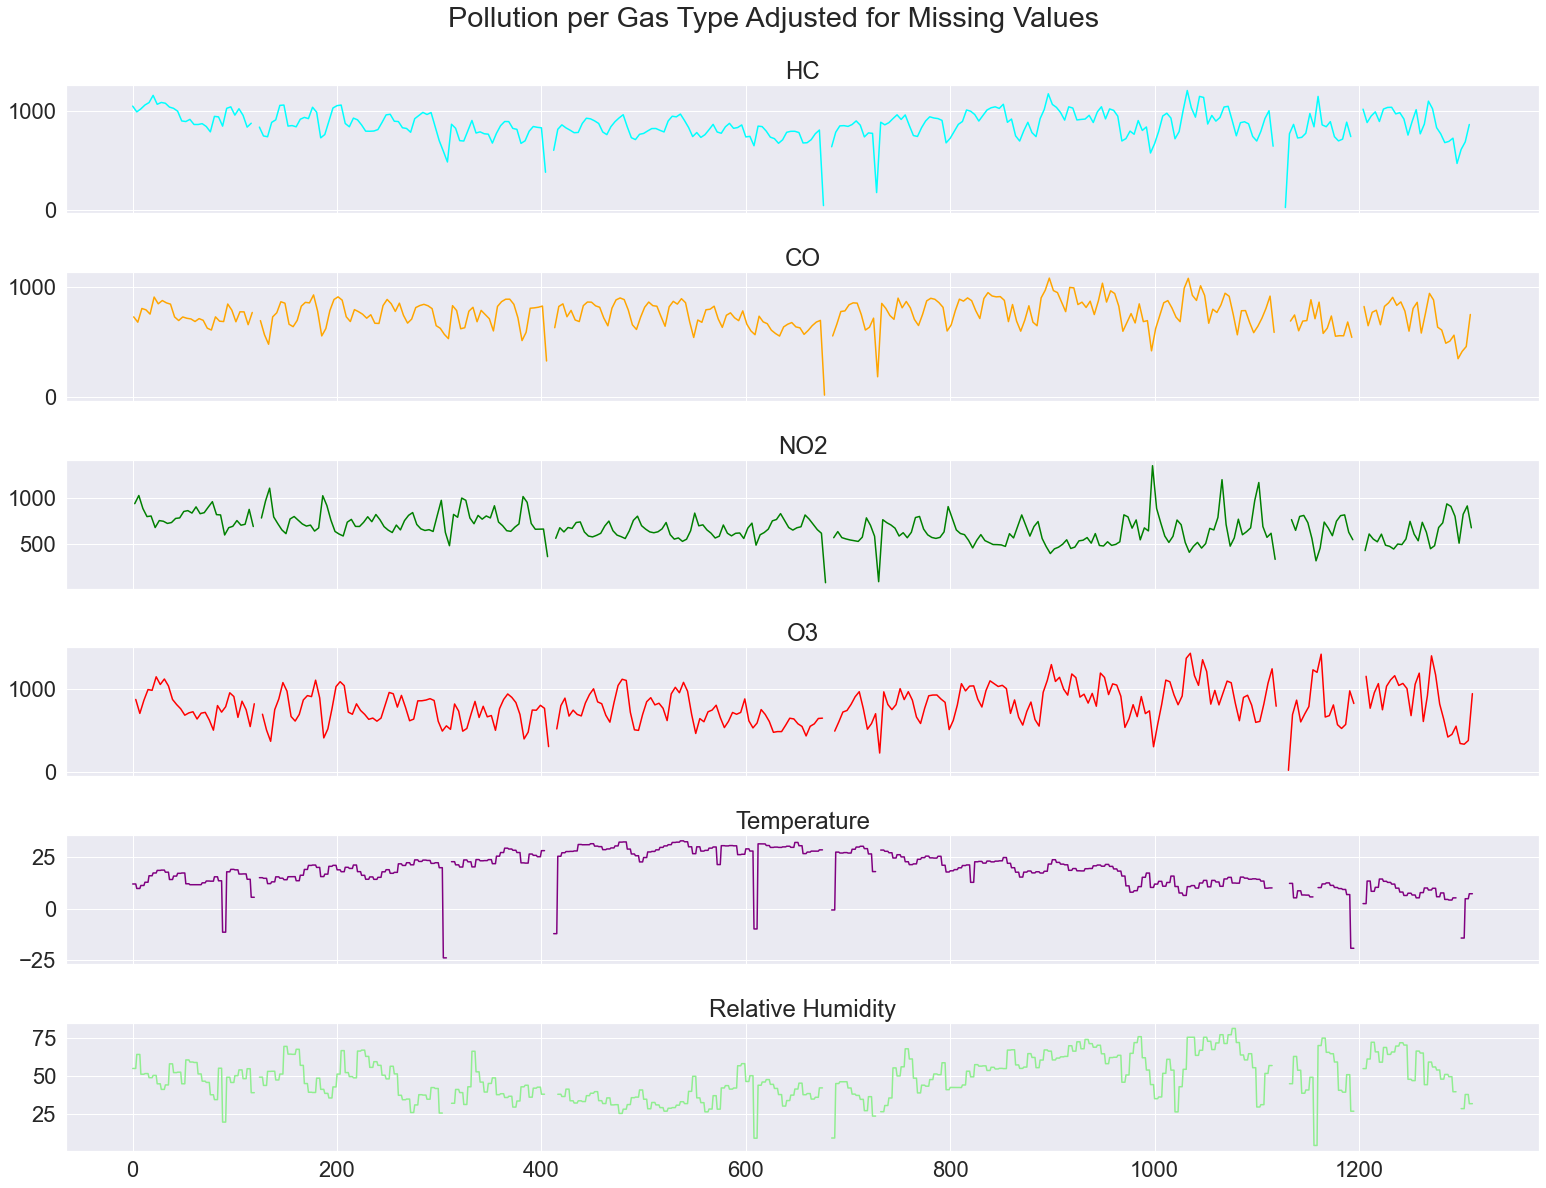

In [174]:
# reassign individual dataframe with new values
gas_co = df.loc[df['Gas'] == 'CO']
gas_HC = df.loc[df['Gas'] == 'HC']
gas_NO2 = df.loc[df['Gas'] == 'NO2']
gas_O3 = df.loc[df['Gas'] == 'O3']
temp = pd.DataFrame(df[['Date','T']],columns=['Date','T'])
temp = temp.rename(columns={'T':'Value'})
rh = pd.DataFrame(df[['Date','RH']],columns=['Date','RH'])
rh = rh.rename(columns={'RH':'Value'})

def plot_adjusted():
    dataframes = [gas_co,gas_HC,gas_NO2,gas_O3,temp,rh]
    gases = ['HC','CO','NO2','O3','Temperature','Relative Humidity']
    palette = ['aqua','orange','green','red','purple','lightgreen']
    i=0
    fig, axes = plt.subplots(6, 1, figsize=(22, 17),sharex=True)
    fig.suptitle('Pollution per Gas Type Adjusted for Missing Values')
    for color,dataframe,gas in zip(palette,dataframes,gases):
        dataframe['Value'].plot(ax=axes[i],color=color).set_title(gas)
        i+=1


plot_adjusted()


### Data Imputation

1. Mean imputation
2. Median imputation
3. Last Observation Carried Forward(LOCF)
4. Next Observation Carried Backward(NOCB)
5. Linear interpolation (rolling window)
6. Spline interpolation (polynomial interpolation)

    https://www.section.io/engineering-education/missing-values-in-time-series/

In [175]:
df =df.sort_values(['Date', 'Gas'], ascending=[True, False])

df

,Date,T,RH,Gas,Value
3,2016-03-15,12.020833,54.883334,O3,876.833333
2,2016-03-15,12.020833,54.883334,NO2,933.800000
1,2016-03-15,12.020833,54.883334,HC,729.800000
0,2016-03-15,12.020833,54.883334,CO,1053.200000
7,2016-03-16,9.833333,64.069791,O3,708.025000
...,...,...,...,...,...
1304,2017-02-04,4.848611,37.832986,CO,691.713889
1311,2017-02-05,7.273958,31.809375,O3,947.333333
1310,2017-02-05,7.273958,31.809375,NO2,673.741667
1309,2017-02-05,7.273958,31.809375,HC,751.833333


In [176]:
# mean imputation
mean = df.copy()
mean = mean.fillna({'T':mean['T'].mean(), 'RH':mean['RH'].mean(),'Value':mean['Value'].mean()})


# median imputation
median = df.copy()
median = median.fillna({'T':median['T'].median(), 'RH':median['RH'].median(),'Value':median['Value'].median()})


# mode imputation
mode = df.copy()
mode = mode.fillna({'T':mode['T'].mode().iloc[0], 'RH':mode['RH'].mode().iloc[0],'Value':mode['Value'].mode().iloc[0]})


# Last Observation Carried Forward (LOCF) imputation
locf = df.copy()
locf[['T','RH','Value']] = locf[['T','RH','Value']].fillna(method ='bfill')


# Next Observation Carried Backward (NOCB) imputation
nocb = df.copy()
nocb[['T','RH','Value']] = nocb[['T','RH','Value']].fillna(method ='ffill')


# Linear Interpolation
linear = df.copy()
linear[['T','RH','Value']] = linear[['T','RH','Value']].interpolate(method='linear')


In [177]:

def mean_finder(df):
    dates = pd.unique(df['Date'])
    for date in dates:
        value = np.mean(df[df['Date']==date]['Linear'])
        df['Linear'].loc[df['Date'] == date] = value
    return df

# temperature imputation
imputed_temp = mean.loc[df[df['T'].isnull()]['T'].index][['Date','T']]
imputed_temp = pd.concat([imputed_temp, median.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp = pd.concat([imputed_temp, mode.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp = pd.concat([imputed_temp, locf.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp = pd.concat([imputed_temp, nocb.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp = pd.concat([imputed_temp, linear.loc[df[df['T'].isnull()]['T'].index][['T']]], axis=1)
imputed_temp.columns = ['Date', 'Mean', 'Median', 'Mode','LOCF','NOCB','Linear']

mean_finder(imputed_temp)
imputed_temp = imputed_temp.drop_duplicates()

# rh imputation
imputed_rh = mean.loc[df[df['RH'].isnull()]['RH'].index][['Date','RH']]
imputed_rh = pd.concat([imputed_rh, median.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh = pd.concat([imputed_rh, mode.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh = pd.concat([imputed_rh, locf.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh = pd.concat([imputed_rh, nocb.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh = pd.concat([imputed_rh, linear.loc[df[df['RH'].isnull()]['RH'].index][['RH']]], axis=1)
imputed_rh.columns = ['Date', 'Mean', 'Median', 'Mode','LOCF','NOCB','Linear']
imputed_rh = imputed_rh.drop_duplicates()

mean_finder(imputed_rh)

# imputed pollution value
imputed_value = mean.loc[df[df['Value'].isnull()]['Value'].index][['Date','Gas','Value']]
imputed_value = pd.concat([imputed_value, median.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value = pd.concat([imputed_value, mode.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value = pd.concat([imputed_value, locf.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value = pd.concat([imputed_value, nocb.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value = pd.concat([imputed_value, linear.loc[df[df['Value'].isnull()]['Value'].index][['Value']]], axis=1)
imputed_value.columns = ['Date','Gas', 'Mean', 'Median', 'Mode','LOCF','NOCB','Linear']

imputed_rh.reset_index(inplace=True)
imputed_temp.reset_index(inplace=True)


imputed_rh = imputed_rh.drop(columns='index',axis=1)
imputed_rh = imputed_rh.set_index('Date')
imputed_temp = imputed_temp.drop(columns='index',axis=1)
imputed_temp = imputed_temp.set_index('Date')


imputed_value



C:\Users\justi\anaconda3\envs\tensor2\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date,Gas,Mean,Median,Mode,LOCF,NOCB,Linear
123,2016-04-14,O3,771.778246,776.291667,609.466667,697.950000,880.419444,843.925556
122,2016-04-14,NO2,771.778246,776.291667,609.466667,697.950000,880.419444,807.431667
121,2016-04-14,HC,771.778246,776.291667,609.466667,697.950000,880.419444,770.937778
120,2016-04-14,CO,771.778246,776.291667,609.466667,697.950000,880.419444,734.443889
411,2016-06-25,O3,771.778246,776.291667,609.466667,519.941667,385.402778,412.310556
410,2016-06-25,NO2,771.778246,776.291667,609.466667,519.941667,385.402778,439.218333
409,2016-06-25,HC,771.778246,776.291667,609.466667,519.941667,385.402778,466.126111
408,2016-06-25,CO,771.778246,776.291667,609.466667,519.941667,385.402778,493.033889
679,2016-08-31,O3,771.778246,776.291667,609.466667,82.016667,811.666667,446.841667
683,2016-09-01,O3,771.778246,776.291667,609.466667,493.341667,48.866667,137.761667


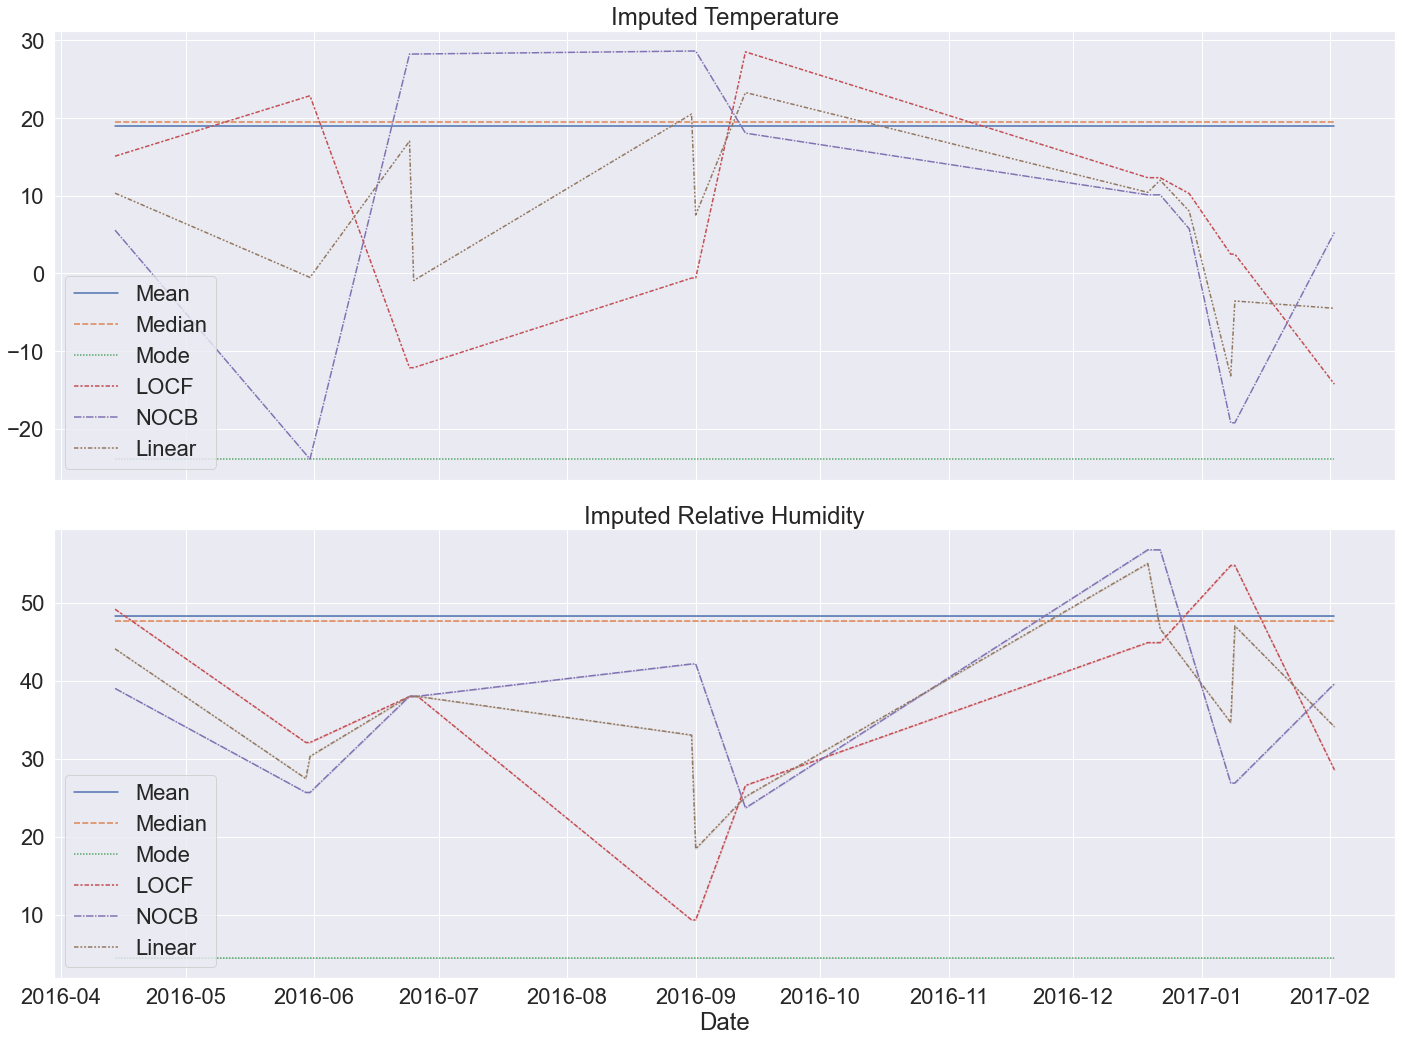

In [178]:

fig, axes = plt.subplots(2, 1, figsize=(20, 15),sharex=True)
ax0 = sns.lineplot(ax=axes[0],data=imputed_temp)
ax0.set(xlabel=None)
ax0.set_title('Imputed Temperature')
ax1 = sns.lineplot(ax=axes[1],data=imputed_rh)
ax1.set_title('Imputed Relative Humidity')


plt.show()

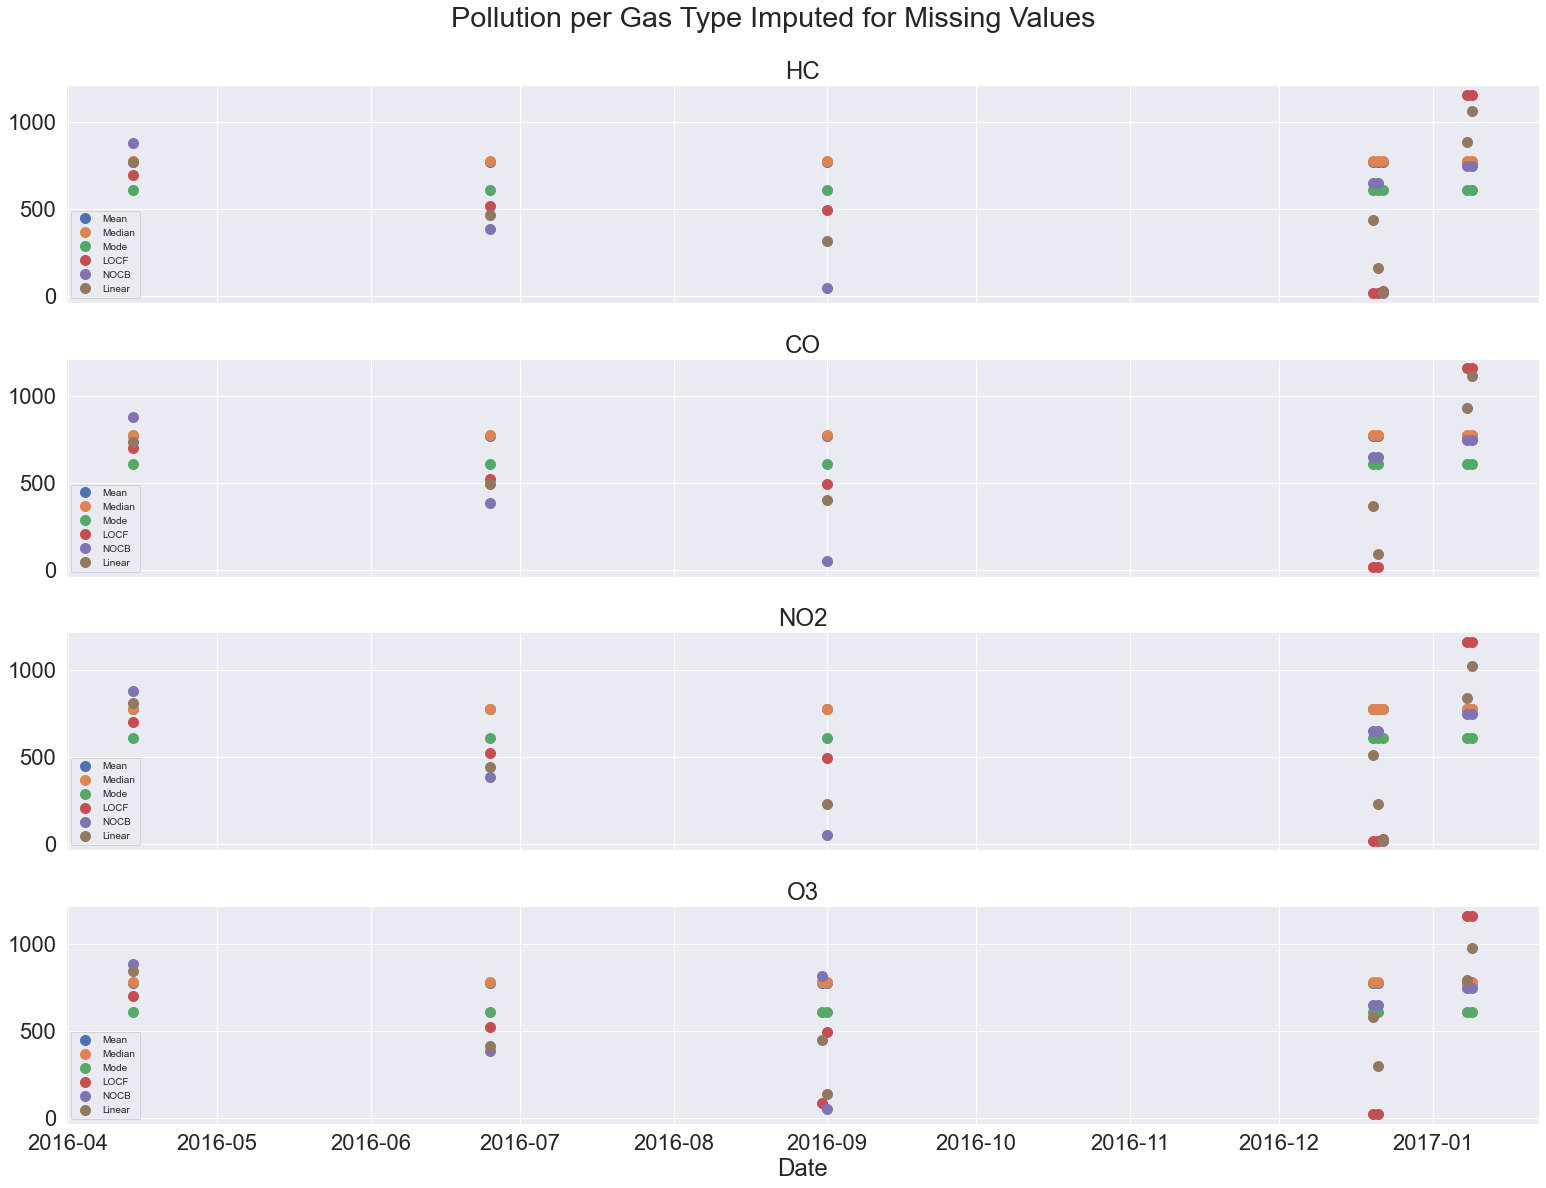

In [179]:

def plot_imputed(df):
    df = df.set_index('Date')
    methods = ['Mean','Median','Mode','LOCF','NOCB','Linear']
    gases = ['HC','CO','NO2','O3']
    i=0
    fig, axes = plt.subplots(4, 1, figsize=(22, 17),sharex=True)
    fig.suptitle('Pollution per Gas Type Imputed for Missing Values')
    for gas in gases:

        df[df['Gas']==gas].plot(style='o',ax=axes[i],title=gas,ms=10).legend(loc='lower left',fontsize=10)

        i +=1

plot_imputed(imputed_value)

### Splitting Data

In [180]:
df = dfs.copy()
# train set
df  = df.iloc[: , :-2]
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df = df.pivot(index='Date', columns='Gas', values=['T','RH','Value'])
df.columns = df.columns.to_series().str.join('_')
df = df.drop(columns=['T_CO','T_HC','T_O3','RH_CO','RH_HC','RH_O3'])
df = df.rename(columns={'T_NO2':'T','RH_NO2':'RH','Value_CO':'CO','Value_HC':'HC','Value_NO2':'NO2','Value_O3':'O3'})

# test set
df_test = df_test.loc[df_test['Gas']=='CO']
df_test = df_test.drop(columns=['Gas'])
df_test = df_test.set_index('Date')

In [181]:
df_test

,T,RH
Date,,
2017-02-06,6.616667,51.734375
2017-02-07,7.613194,43.930903
2017-02-08,7.252083,50.966667
2017-02-09,7.473611,50.166319
2017-02-10,5.571875,46.604167
...,...,...
2017-04-05,17.554167,50.092708
2017-04-06,15.919792,35.959722
2017-04-07,15.489583,32.213542


### ETS (Error/Trend/Seasonality) Model
ETS model describes the time series data by decomposing the data into 3 components: trend, seasonality, and errors. (Jie, 2021)

There are 2 models available for ETS, Additive and Multiplicative.
> Additive: applicable when the trend and seasonality components are constant (or linear) over time.
>
> Multiplicative: applicable when the trend increasing or decreasing is at a non-linear rate.

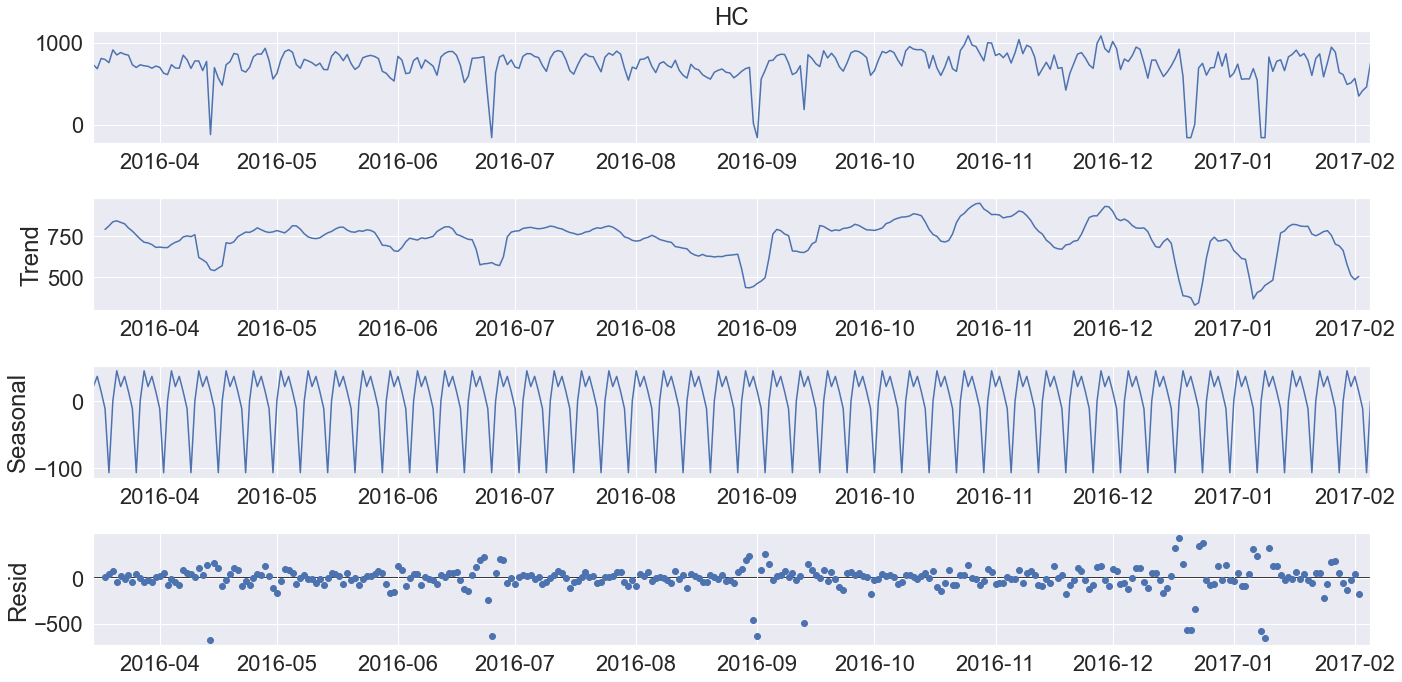

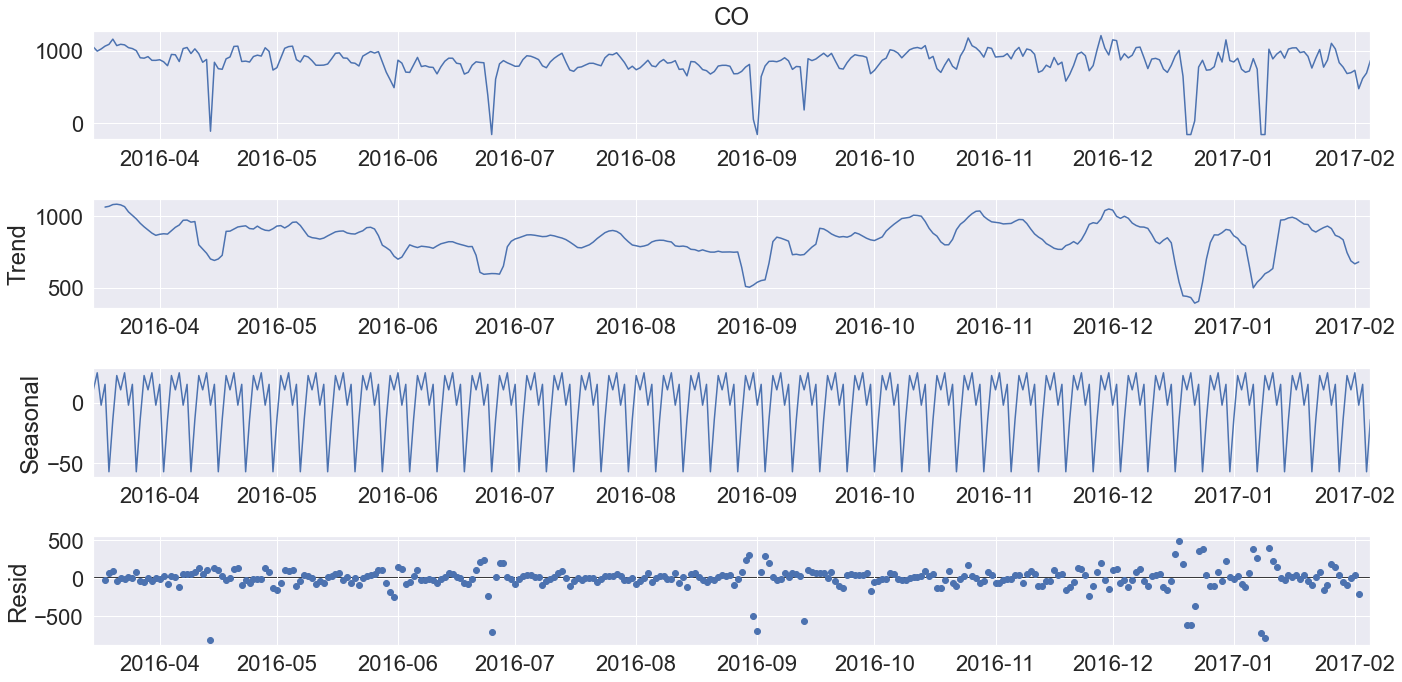

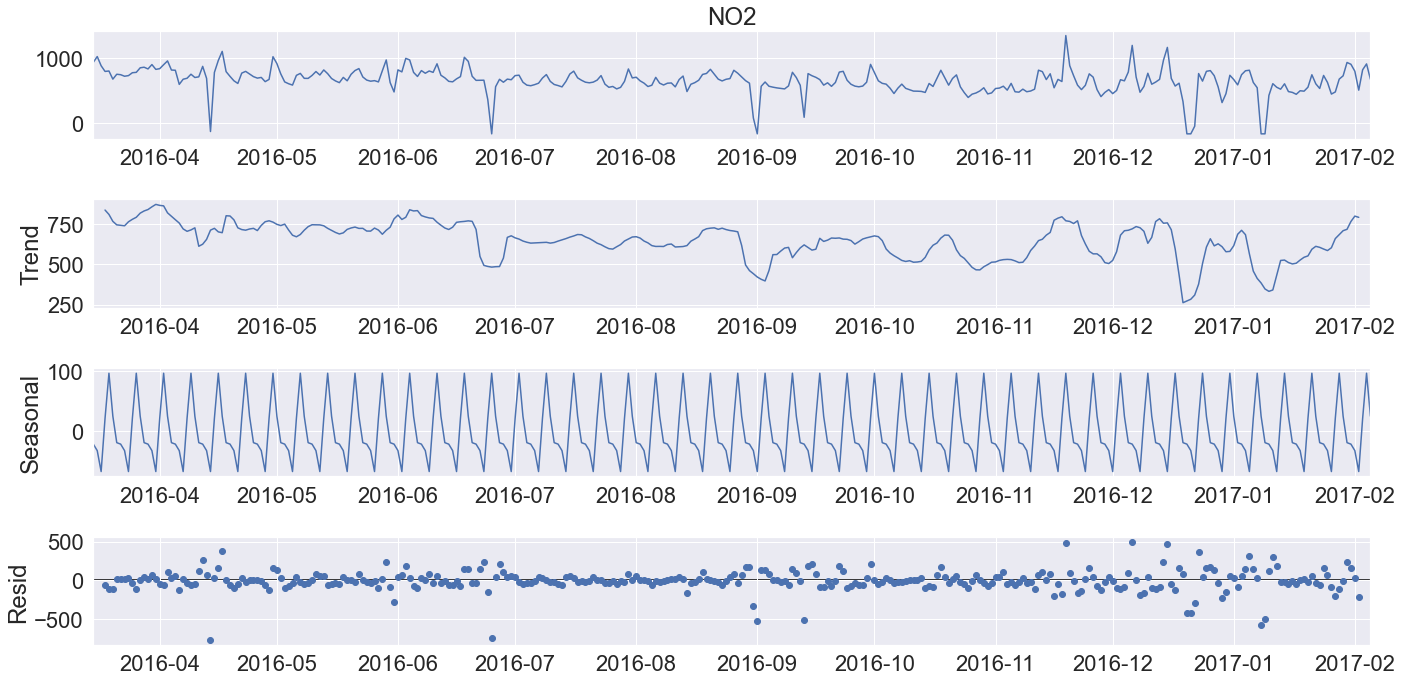

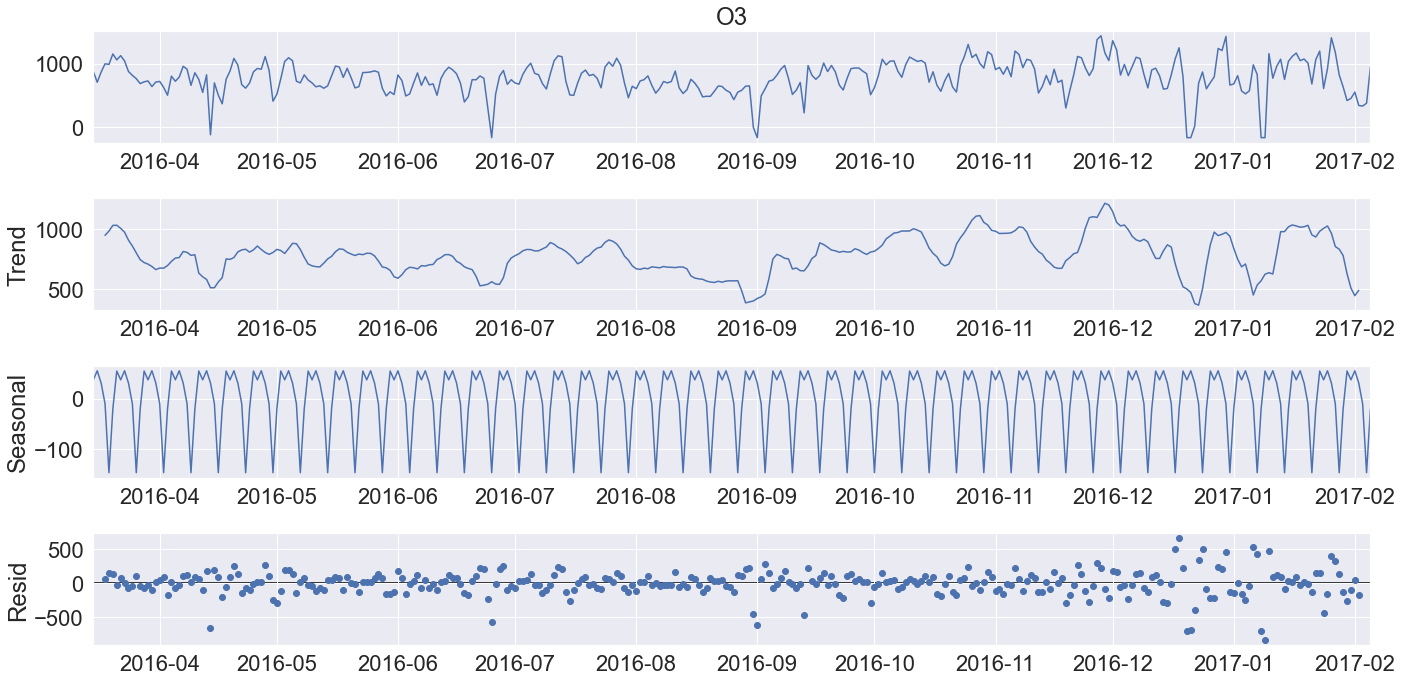

In [182]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

from statsmodels.tsa.seasonal import seasonal_decompose
gases = ['HC','CO','NO2','O3']

for gas in gases:
    result_add = seasonal_decompose(df[gas],model = 'add',period=7)
    result_add.plot()



### Augmented Dickey-Fuller Test for Stationarity

In [183]:
from statsmodels.tsa.stattools import adfuller

def stationary(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

adf_test_results = {
    col: stationary(df, col)
    for col in ['T','RH','CO','NO2','O3','HC']
}

display(adf_test_results)


{'T': 'Stationary',
 'RH': 'Stationary',
 'CO': 'Stationary',
 'NO2': 'Stationary',
 'O3': 'Stationary',
 'HC': 'Stationary'}

### AutoCorrelation Function (ACF) and Partial AutoCorrelation function (PACF)


#### Autocorrelation Function (ACF)
Correlation between time series with a lagged version of itself. The correlation between the observation at the current time spot and the observations at previous time spots.The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

We will be using the `plot_acf` function from the `statsmodels.graphics.tsaplots` library. (See statsmodels.tsa.stattools.acf)

The ACF plot can provide answers to the following questions:

- Is the observed time series white noise / random?
- Is an observation related to an adjacent observation, an observation twice-removed, and so on?
- Can the observed time series be modeled with an MA model? If yes, what is the order?

#### Partial Autocorrelation Function (PACF)
Additional correlation explained by each successive lagged term. The correlation between observations at two time spots given that we consider both observations are correlated to observations at other time spots.

The partial autocorrelation at lag k is the autocorrelation between  Xt  and  Xt−k  that is not accounted for by lags 1 through  k−1 .

We will be using the `plot_pacf` function from the `statsmodels.graphics.tsaplots` library with the parameter method = "ols" (regression of time series on lags of it and on constant). (See statsmodels.tsa.stattools.pacf)

Sidenote: The default parameter for `method` is `yw` (Yule-Walker with sample-size adjustment in denominator for acovf). However, this default value is causing some implausible autocorrelations higher than 1 on the sample data. Therefore, we change the method parameter to one that is not causing this issue. `ywmle` would also work fine as suggested in this StackExchange post.
The PACF plot can provide answers to the following questions:

- Can the observed time series be modeled with an AR model? If yes, what is the order?


[Credit](https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook)

In [184]:
df

,T,RH,CO,HC,NO2,O3
Date,,,,,,
2016-03-15,12.020833,54.883334,1053.200000,729.800000,933.800000,876.833333
2016-03-16,9.833333,64.069791,995.250000,681.441667,1021.750000,708.025000
2016-03-17,11.292708,51.107292,1025.250000,806.583333,881.375000,867.375000
2016-03-18,12.866319,51.530903,1064.444444,794.258333,794.527778,996.625000
2016-03-19,16.016667,48.843750,1088.741667,755.083333,800.883333,987.341667
...,...,...,...,...,...,...
2017-02-01,5.267708,39.614930,729.422222,562.650000,797.647222,553.180556
2017-02-02,-55.515972,-24.010417,474.291667,347.480556,508.180556,343.500000
2017-02-03,-14.272917,28.563542,615.700000,414.475000,819.733333,334.458333


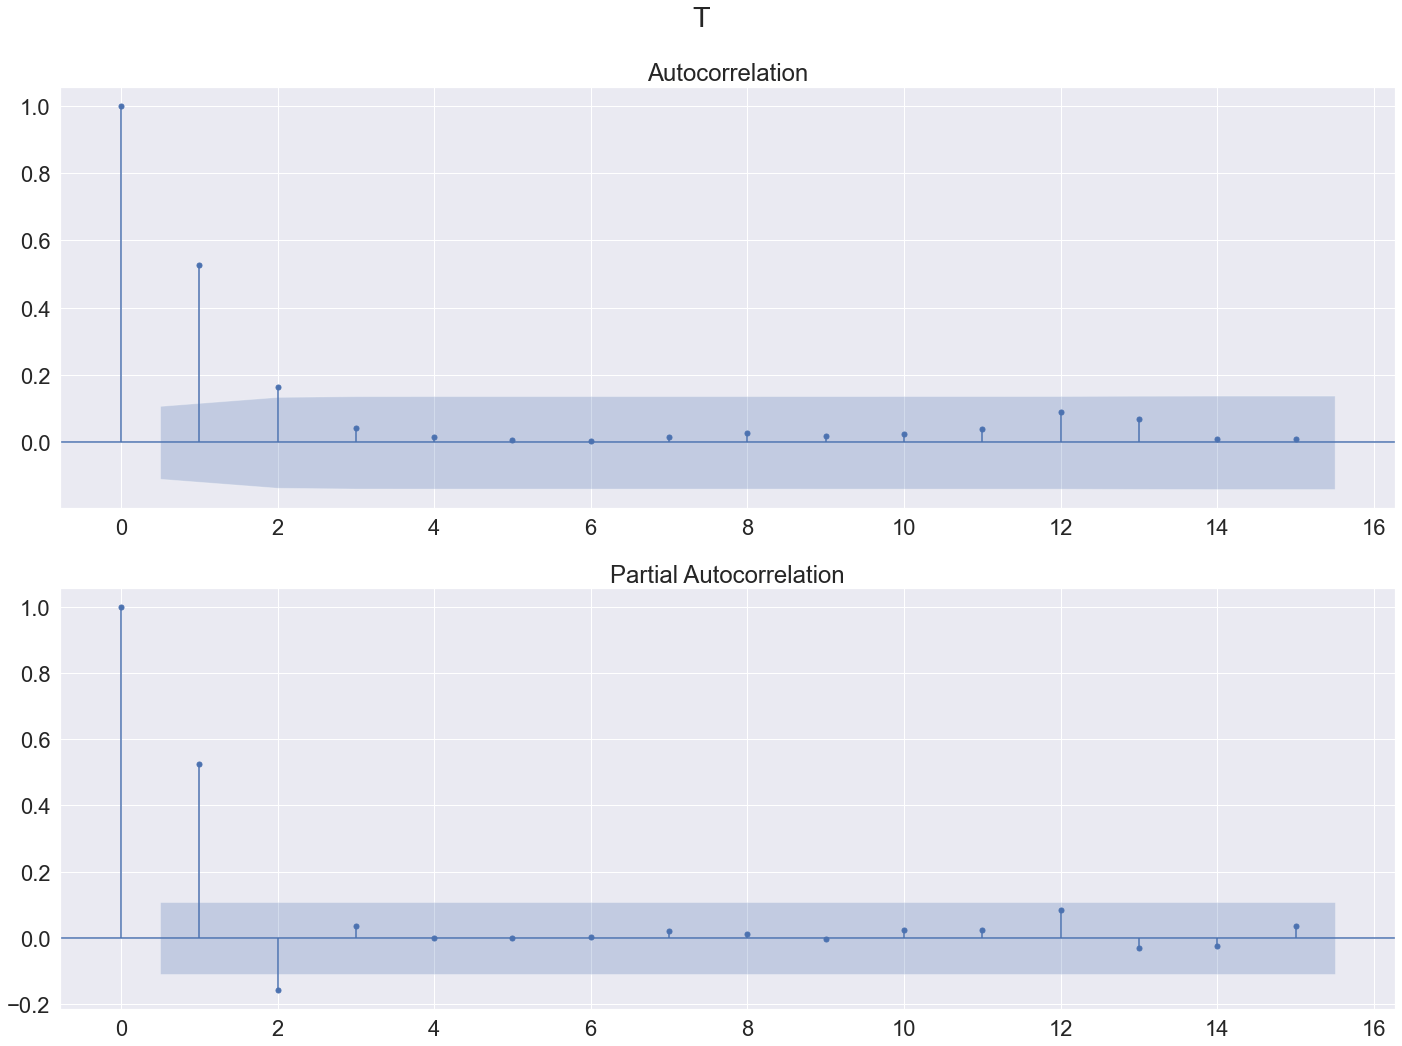

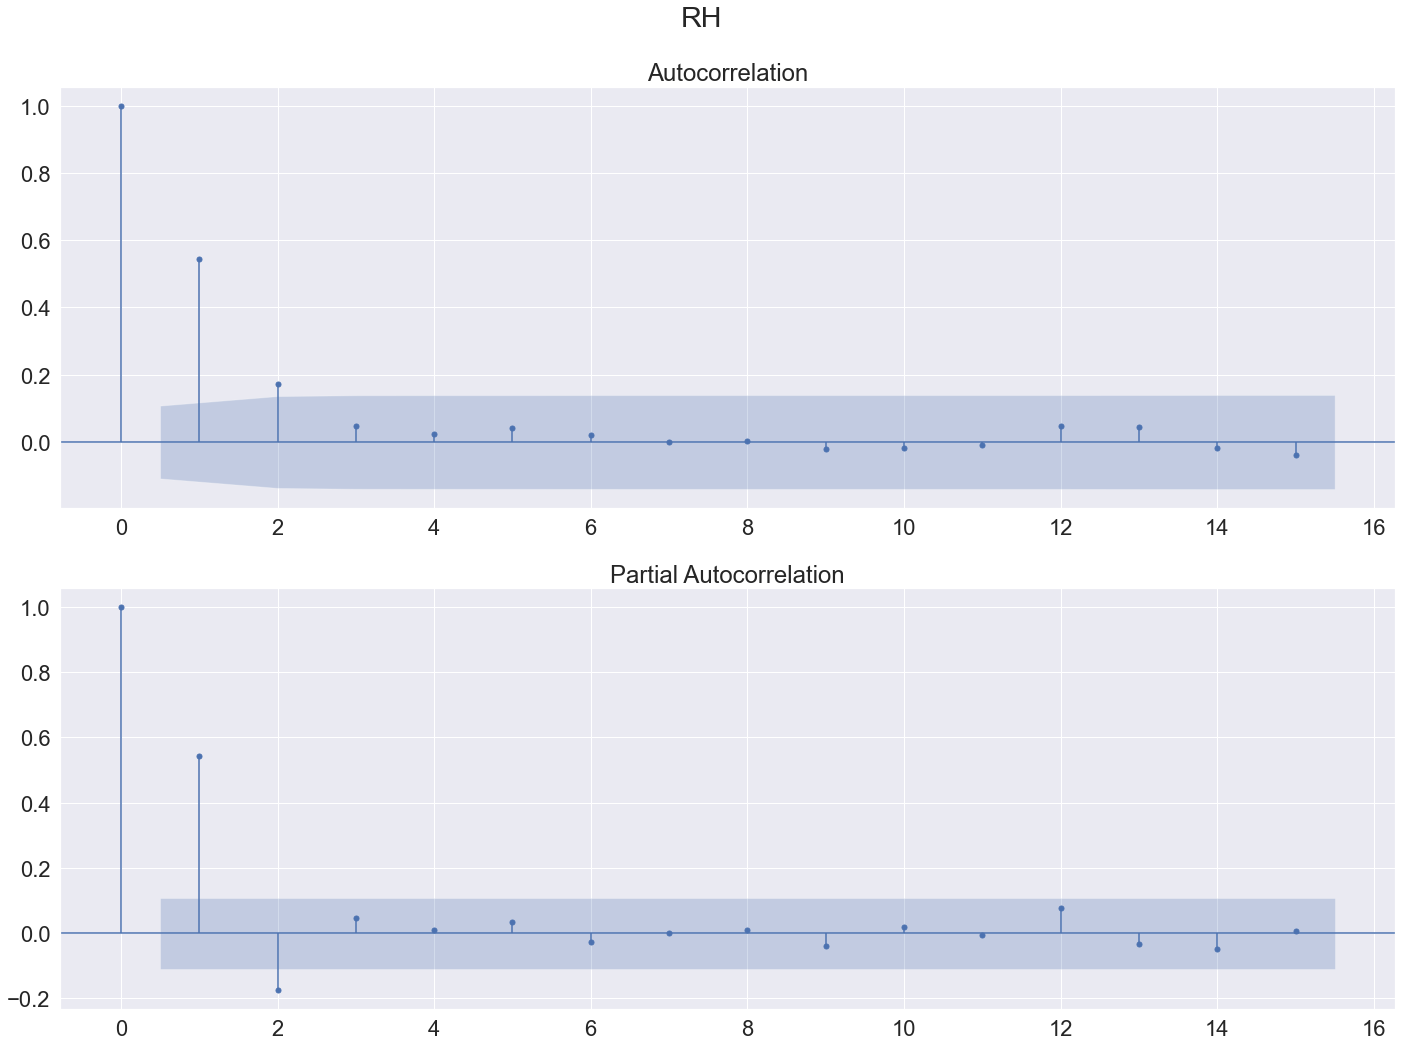

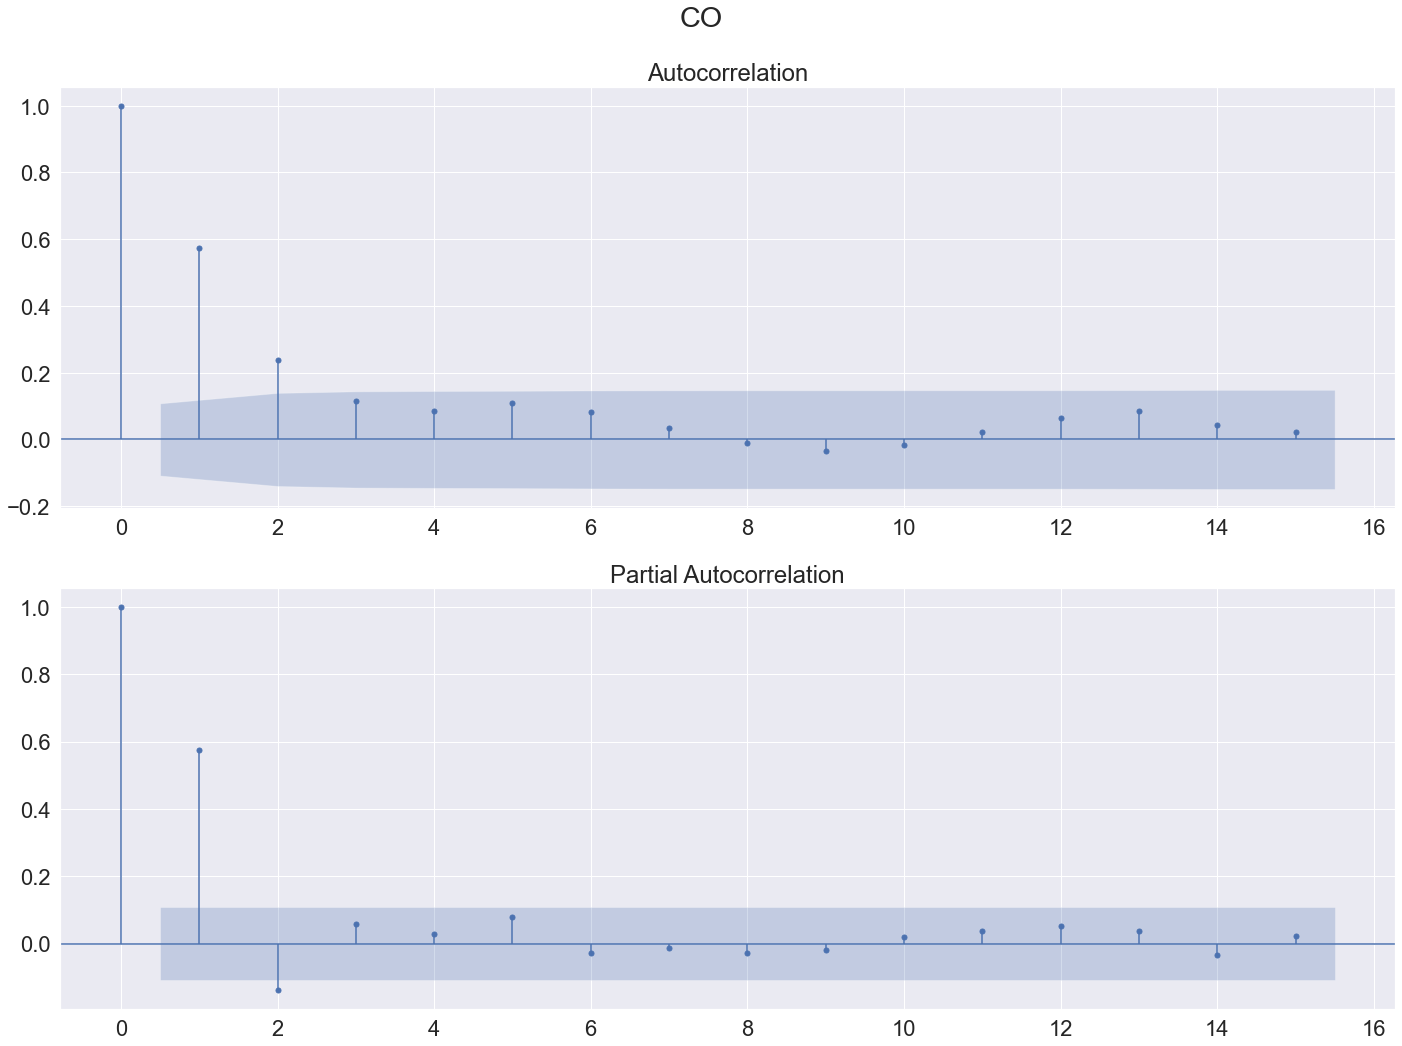

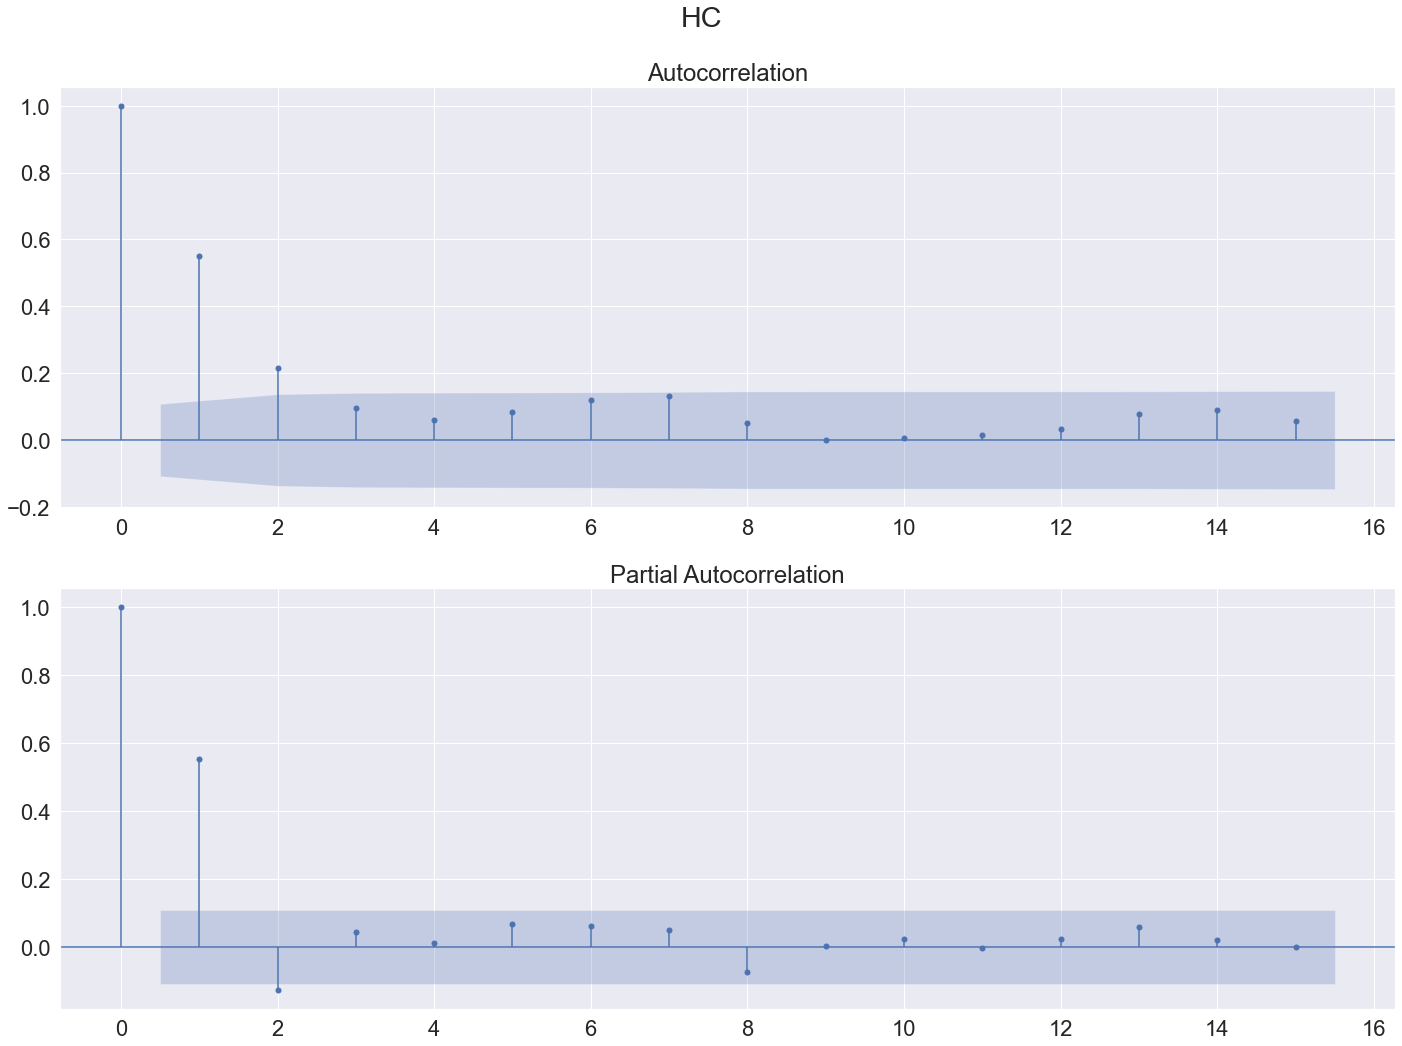

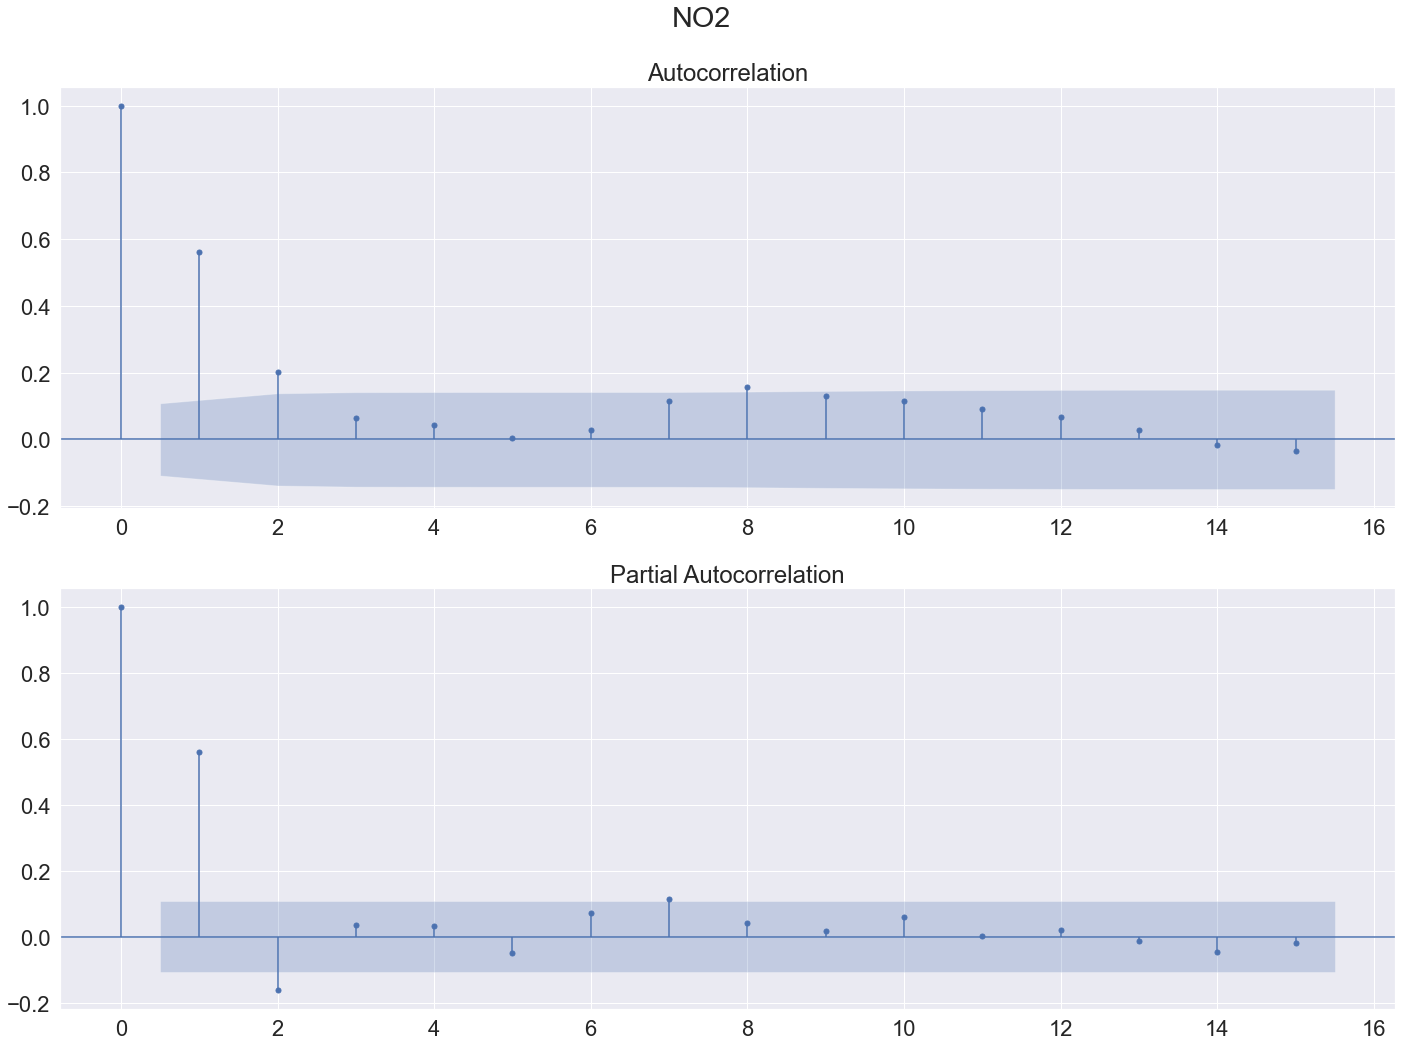

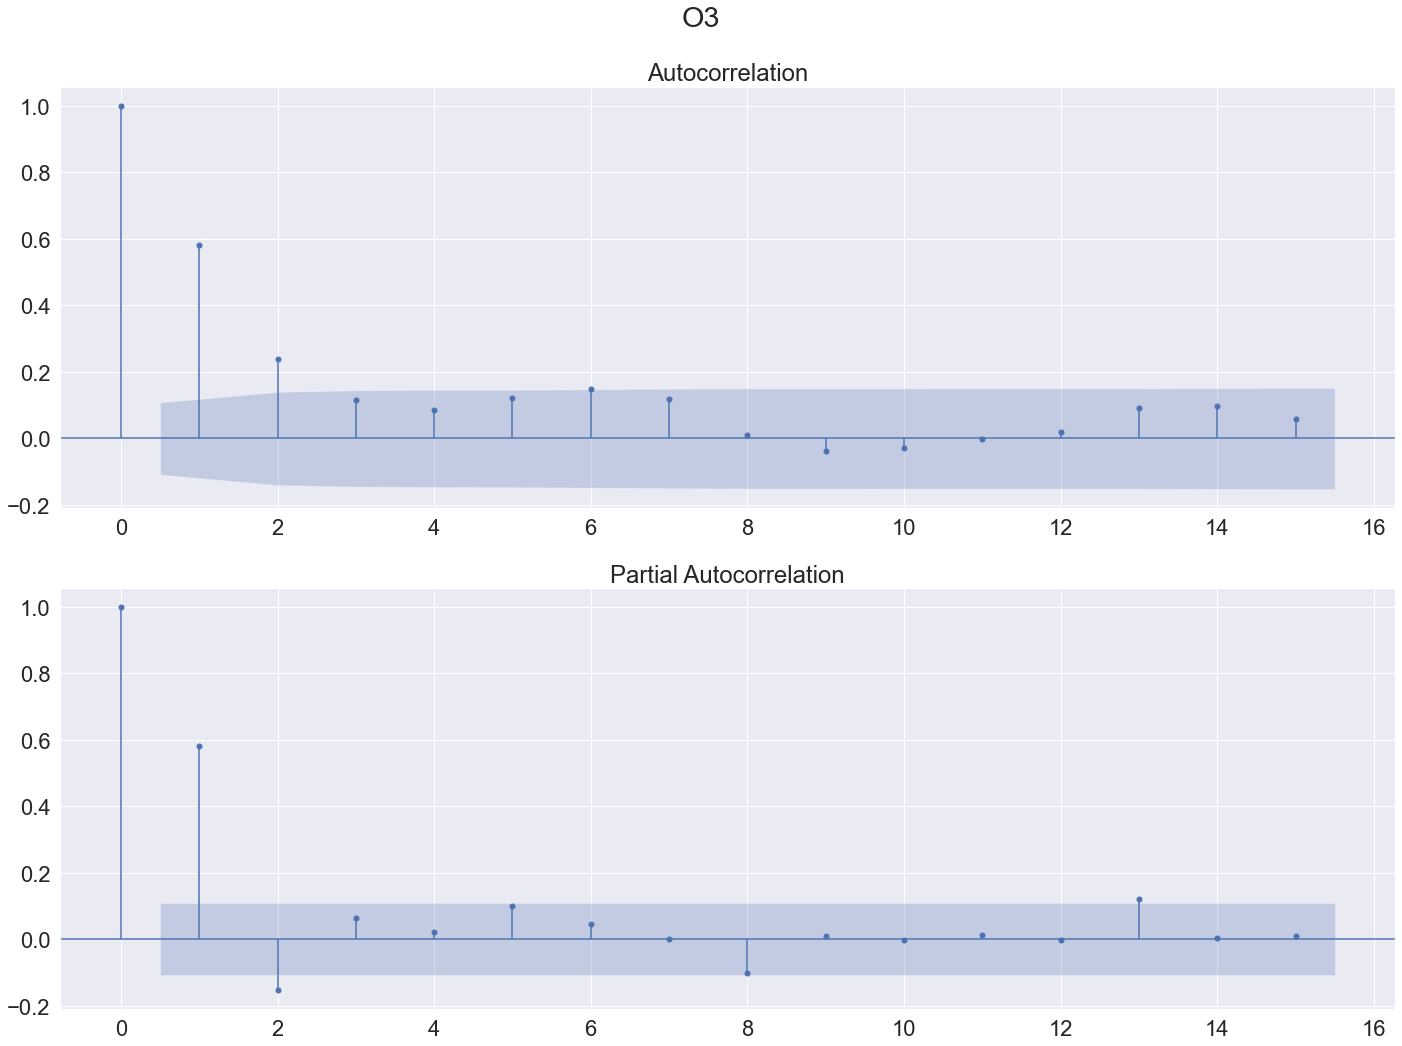

In [185]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


def plot_acf_graph(df):
    for col in df.columns:
        i=0
        f, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
        plot_acf(df[col],lags=15, ax=ax[i])
        plot_pacf(df[col],lags=15, ax=ax[i+1], method='ols')
        plt.tight_layout()
        plt.suptitle(col)
        plt.show()

plot_acf_graph(df)



Analysis:

All autocorrelations are significantly non-zero. Therefore, the time series is non-random.


### Granger's Causality Test

The Granger Causality test is used to determine whether or not one time series is useful for forecasting another.

This can be used to determine whether the Temperature and RH time series are useful for forecasting the different gases.

In [186]:
from statsmodels.tsa.stattools import grangercausalitytests


maxlag=7
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,T_x,RH_x,CO_x,HC_x,NO2_x,O3_x
T_y,1.0000,0.1257,0.6593,0.7240,0.2505,0.5953
RH_y,0.0380,1.0000,0.2407,0.3673,0.0305,0.1439
CO_y,0.0350,0.0250,1.0000,0.1240,0.2394,0.2242
HC_y,0.0141,0.0046,0.0003,1.0000,0.0659,0.3977
NO2_y,0.1702,0.3143,0.4698,0.1523,1.0000,0.0833
O3_y,0.0140,0.0285,0.0049,0.3991,0.0324,1.0000


Analysis:

We can observe that Temperature Granger cause:
1. Relative Humidity
2. CO Amount
3. HC Amount
4. O3 Amount

We can also observe Relative Humidity Granger Causes:
1. CO Amount
2. HC Amount
3. O3 Amount

Interesting observations are that Temperature causes Relative Humidity but the converse is not true.

This may be due to the fact that the dataset given is based on an Italian City.

Since Italy is surrounded by a body of water, the shortwave radiation from the Sun may hit the ocean water and cause the water to evaporate and increase the content of water vapour in the air. And when the temperature increases, the warmer air needs more moisture to reach its saturation point, while colder air has a much lower saturation threshold—it's relative to the current temperature. Hence, temperature causes relative humidity.

We can observe a common occurrence in that NO2 is not present in either the causation of temperature or relative humidity.

This is due to the fact that Nitrogen Dioxide (NO2) is actually produced by the burning of fuel. NO2 forms from emissions from cars, trucks and buses, power plants, and off-road equipment. (US EPA,OAR, 2016)

However, according to a study in 2019, Chinese scientists conducted a study on the effect of temperature and relative humidity on NO2 Pollution (Negative levels of NO2 present in the air). The findings suggested that season and temperature strongly modified the adverse effects of NO2: in the cold season and on days with low temperatures, the adverse effect of NO2 on cardiovascular mortality was significantly enhanced. (Duan et al., 2019)

Hence, we will depend on the findings of the model to interpret this relationship.



## Model Exploration

We will explore the baseline statistical models used with time-series data along with multivariate time-series models as we have more than 2 columns (Time, Target Variable)

Model exploration will be able to give us a good representation and comparison of the performance of each model.

The models that we will be exploring will be:
1. Simple Moving Average
2. Exponential Smoothing
3. Vector Autoregressions (VAR) note (Forecast Error Variance Decomposition (FEVD))
4. Vector Moving Average (VMA)
5. Vector Auto-Regressive Integrated Moving Average (VARIMA)
6. Vector Error Correction Model (VECM)
7. Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX)
8. Vector Autoregressive Moving-Average processes with eXogenous regressors (VARMAX)

### Simple Moving Average Model

### Holt-Winter Exponential Smoothing Model

### Vector Autoregressions (VAR)
Note: (Forecast Error Variance Decomposition (FEVD))

### Vector Moving Average (VMA)

### Vector Auto-Regressive Integrated Moving Average (VARIMA)

### Vector Error Correction Model (VECM)

### Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX)

### Vector Autoregressive Moving-Average processes with eXogenous regressors (VARMAX)